## Value Iteration Algorithm

In [13]:
import sys
sys.path.append('/home/gabe/.local/lib/python3.8/site-packages')

In [14]:
import gym
problem = "FrozenLake8x8-v0"
if problem == "FrozenLake-v0":
    psize = 4
else:
    psize = 8
    
env = gym.make(problem)

In [15]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import math
from datetime import datetime

In [16]:
def fancy_visual(value_func,policy_int,size):    
    grid = size
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped=np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap=cmap, vmax=1.1,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter=0
    for j in range(0, size):
        for i in range(0, size):
            if policy_int[counter]==1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif policy_int[counter]==3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif policy_int[counter]==0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function',value_func)
    print('Policy',policy_int)
    plt.show()

In [17]:
def value_iter(V, P, nA, nS):
    gamma = 0.9
    iterations = 0
    new_V = [0]*nS
    policy = [0]*nS        
    delta = 0
        
    for s in range(nS):
        old_value = new_V[s]
        new_v = [0]*nA
        for a in range(nA):
            for prob, next_s, reward, terminal in P[s][a]:
                new_v[a] += prob * (reward + gamma * V[next_s])
        
        new_V[s] = max(new_v)
        policy[s] = np.argmax(new_v)
        delta = max(delta, abs(old_value - new_V[s]))
        
    return new_V, policy

In [18]:
def l2_norm(value_function, new_value_function):
    s = 0
    for i in range(len(value_function)):
        s += (value_function[i]-new_value_function[i])**2
    return math.sqrt(s)

Starting: 2021-04-25 13:49:28.823512
Ending: 2021-04-25 13:49:28.860039
It took:0:00:00.036435


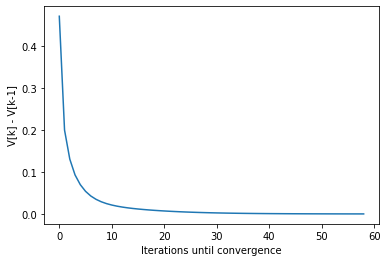

Delta obtained:  9.214786292000723e-05
Iterations:  60


In [23]:
theta = 0.0001
V = [0]*env.nS
policy = None

print("Starting: " + str(datetime.now()))
starting = datetime.now()

n_iter = 500
diff = []
for i in range(n_iter):
    new_V, policy = value_iter(V, env.P, env.nA, env.nS)
    delta = l2_norm(V, new_V)
    if delta < theta:
        break
    diff.append(delta)
    V = new_V

print("Ending: " + str(datetime.now()))
it_took = datetime.now() - starting

print("It took:" + str(it_took))
    
#print(diff)
plt.plot(diff)
plt.ylabel('V[k] - V[k-1]')
plt.xlabel('Iterations until convergence')
plt.show()
print("Delta obtained: ", delta)
print("Iterations: ", i+1)

In [20]:
env.P

{0: {0: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 8, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 8, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  2: [(0.3333333333333333, 8, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)],
  3: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 1: {0: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 9, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 9, 0.0, False),
   (0.3333333333333333, 2, 0.0, False)],
  2: [(0.3333333333333333, 9, 0.0, False),
   (0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  3: [(0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},


Value Function [0.006241643863578226, 0.00838828733291733, 0.01215471536636787, 0.017659140081865296, 0.02496539604579182, 0.03235787977924054, 0.03946309238356575, 0.04287242782224507, 0.005852590359334391, 0.007481071899040775, 0.01076040974010317, 0.01629247244779536, 0.025942991325991878, 0.03608554089943761, 0.049253125515044, 0.057207313664593404, 0.004917276287799613, 0.005687629748613924, 0.0066244315195119335, 0.0, 0.02547150632659355, 0.03871912093224186, 0.0675488903102456, 0.08427103747135256, 0.00405700458334999, 0.004613089983981351, 0.0056919415221544445, 0.007784546157272721, 0.020283496699819013, 0.0, 0.09167651972298815, 0.12911884127314294, 0.0030258609663249606, 0.003061253715115608, 0.002615916259604584, 0.0, 0.034386387293699194, 0.06189720295569284, 0.10895318707522915, 0.20963077376458267, 0.0017228507491067306, 0.0, 0.0, 0.010833884562523419, 0.03246356904128883, 0.06300638465956745, 0.0, 0.3600446352178324, 0.0010434369450686952, 0.0, 0.001355599053479103, 0.0

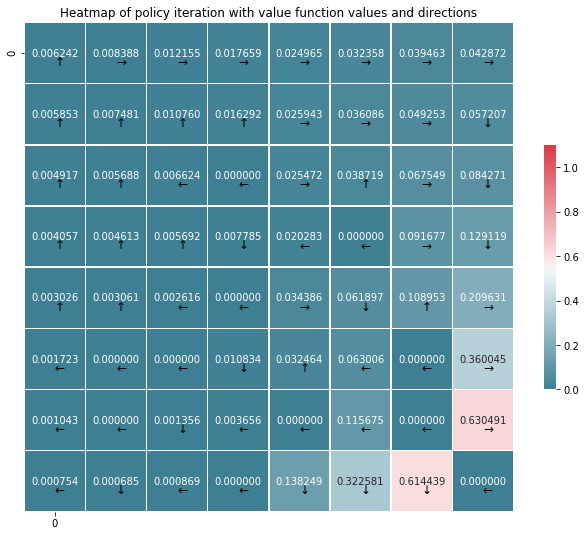


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [21]:
fancy_visual(V, policy, psize)
env.render()

In [22]:
gamma = 0.9
def q_func(V, P, nA, nS):
    q = np.zeros((nS, nA))
    for s in range(nS):
        for a in range(nA):
            for prob, next_s, reward, terminal in P[s][a]:
                q[s][a] += prob * (reward + gamma * V[next_s])
    return q

print('Optimal Q function')
q_func(V, env.P, env.nA, env.nS)

Optimal Q function


array([[5.50076343e-03, 6.14475647e-03, 6.14475647e-03, 6.26147252e-03],
       [6.63330093e-03, 7.76322934e-03, 8.40722238e-03, 8.03539397e-03],
       [9.39102373e-03, 1.10423511e-02, 1.21722796e-02, 1.14606428e-02],
       [1.38318984e-02, 1.60237752e-02, 1.76751026e-02, 1.64337754e-02],
       [2.05702582e-02, 2.27880034e-02, 2.49798801e-02, 2.24947248e-02],
       [2.80226450e-02, 3.01542088e-02, 3.23719539e-02, 2.90359105e-02],
       [3.63222293e-02, 3.73450299e-02, 3.94765937e-02, 3.44080200e-02],
       [4.18628502e-02, 4.18628502e-02, 4.28856508e-02, 3.75623844e-02],
       [5.10345315e-03, 5.47528156e-03, 5.59199762e-03, 5.87259184e-03],
       [5.97855223e-03, 6.69018895e-03, 7.45089805e-03, 7.50038623e-03],
       [7.87806564e-03, 9.11939276e-03, 1.05214858e-02, 1.07784779e-02],
       [8.52586495e-03, 1.10110203e-02, 1.30806394e-02, 1.63087623e-02],
       [2.00188124e-02, 2.33548559e-02, 2.59567330e-02, 2.32030228e-02],
       [2.91059976e-02, 3.41745713e-02, 3.60990379e